In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-ultimate-halloween-candy-power-ranking/candy-data.csv


In [2]:
data = pd.read_csv('/kaggle/input/the-ultimate-halloween-candy-power-ranking/candy-data.csv')

In [3]:
data.head(3)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086


In [4]:
# correlation matrix between flavours
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data.dtypes

competitorname       object
chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercent        float64
pricepercent        float64
winpercent          float64
dtype: object

In [6]:
correlation_matrix = data.corr(method='pearson').round(3)
correlation_matrix

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
chocolate,1.000,-0.742,0.250,0.378,0.255,0.341,-0.344,0.597,-0.340,0.104,0.505,0.637
fruity,-0.742,1.000,-0.335,-0.399,-0.269,-0.269,0.391,-0.515,0.300,-0.034,-0.431,-0.381
caramel,0.250,-0.335,1.000,0.059,0.328,0.213,-0.122,0.334,-0.270,0.222,0.254,0.213
peanutyalmondy,0.378,-0.399,0.059,1.000,0.213,-0.018,-0.206,0.260,-0.206,0.088,0.309,0.406
nougat,0.255,-0.269,0.328,0.213,1.000,-0.090,-0.139,0.523,-0.310,0.123,0.153,0.199
crispedricewafer,0.341,-0.269,0.213,-0.018,-0.090,1.000,-0.139,0.424,-0.225,0.070,0.328,0.325
hard,-0.344,0.391,-0.122,-0.206,-0.139,-0.139,1.000,-0.265,0.015,0.092,-0.244,-0.310
bar,0.597,-0.515,0.334,0.260,0.523,0.424,-0.265,1.000,-0.593,0.100,0.518,0.430
pluribus,-0.340,0.300,-0.270,-0.206,-0.310,-0.225,0.015,-0.593,1.000,0.046,-0.221,-0.247
sugarpercent,0.104,-0.034,0.222,0.088,0.123,0.070,0.092,0.100,0.046,1.000,0.330,0.229


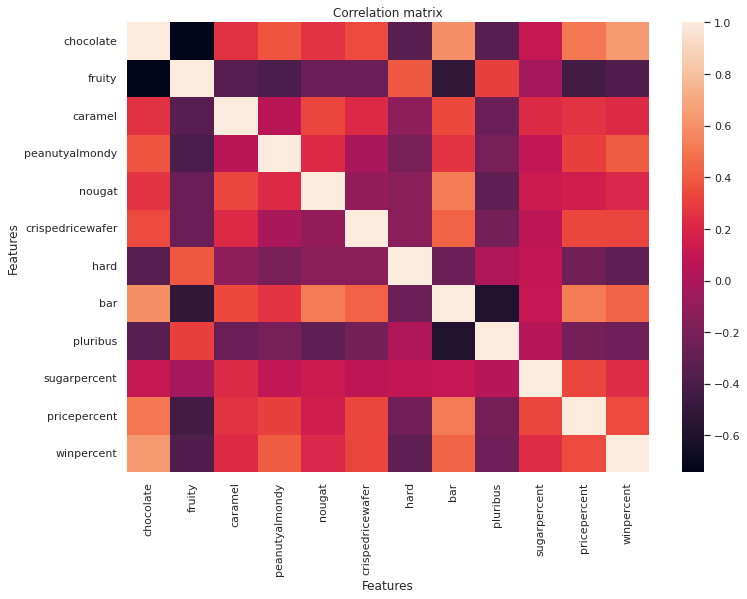

In [13]:
sns.heatmap(correlation_matrix, annot=False)
plt.title('Correlation matrix')
plt.xlabel('Features')
plt.ylabel('Features')
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()

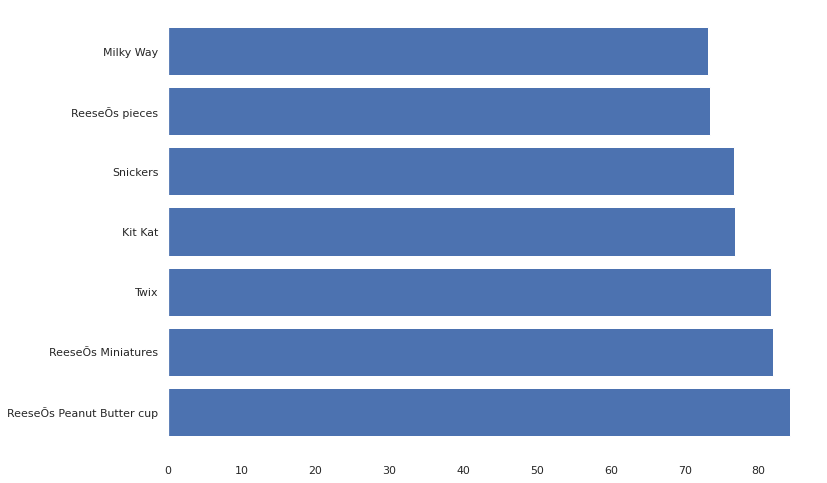

In [8]:
top_competitors = data.nlargest(7, ['winpercent'])
top_competitors
plt.barh(top_competitors['competitorname'], top_competitors['winpercent'])
# plt.xticks(rotation=90)
# plt.xticks(rotation=90)
plt.grid(False)
ax = plt.gca()
ax.set_facecolor('white')

In [9]:
top_competitors

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
53,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556


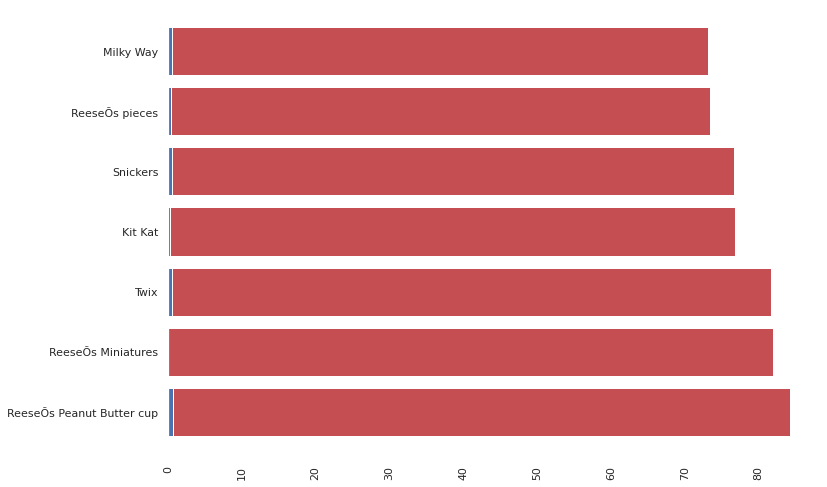

In [10]:
top_competitors = data.nlargest(7, ['winpercent'])
top_competitors
plt.barh(top_competitors['competitorname'],top_competitors['winpercent'], color='r')
plt.barh(top_competitors['competitorname'],top_competitors['sugarpercent'],color='b')
plt.xticks(rotation=90)
plt.grid(False)

ax = plt.gca()
ax.set_facecolor('white')

In [11]:
# Reesees peanut buttercups have the highest preference or win rate

reeses = top_competitors.iloc[:1]
reeses

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.72,0.651,84.18029


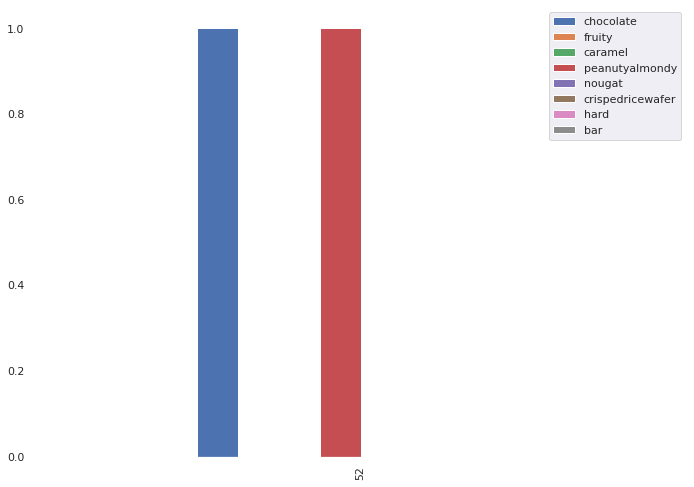

In [12]:
reeses = reeses.iloc[:, :9]
reeses.plot(kind='bar')
plt.xticks(rotation=90)
plt.grid(False)

ax = plt.gca()
ax.set_facecolor('white')